In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "drive" / "MyDrive" / "Colab Notebooks" /  "T5 - Bootcamp" / "data" / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Get the dataset

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist.data, mnist.target

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

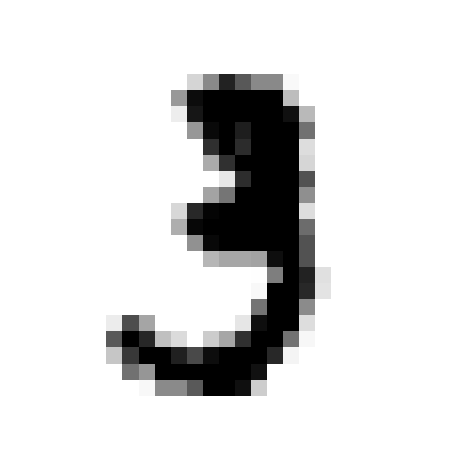

In [8]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[10]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

## Split the dataset

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training a Binary Classifier

In [10]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')


### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train_5)


DecisionTreeClassifier()

In [ ]:
dt_cls.predict(X_train[:10])

array([ True, False, False, False, False, False,  True, False, False,
       False])

#### Performance measure

##### Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_dt = dt_cls.predict(X_train)

accuracy_score(y_train_5, y_pred_dt)

1.0

##### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    y_train_5,
    y_pred_dt
)

cm

array([[50960,     0],
       [    0,  5040]])

#### Fine tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2, 3, 4],
    "max_leaf_nodes": [2, 3, 4]
}

grid_search = GridSearchCV(
  dt_cls,
  param_grid,
  cv=3)

grid_search.fit(X_train, y_train_5)



GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4], 'max_leaf_nodes': [2, 3, 4]})

In [ ]:
grid_search.best_params_

{'max_depth': 2, 'max_leaf_nodes': 3}

### SGDClassifier

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_cls = SGDClassifier()

sgd_cls.fit(X_train, y_train_5)

SGDClassifier()

In [12]:
sgd_cls.predict(X_train[:10])

array([False, False,  True, False, False, False,  True, False, False,
       False])

#### Performance Measure

##### Accuracy score

In [13]:
from sklearn.metrics import accuracy_score

y_pred_sgd = sgd_cls.predict(X_train)

accuracy_score(y_train_5, y_pred_sgd)

0.9643571428571428

##### Confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_pred_sgd)

cm

array([[50046,   914],
       [ 1082,  3958]])

#### Fine tunning

In [15]:

from sklearn.model_selection import RandomizedSearchCV

param_rs = {
    "loss": [ "log",  "perceptron"],
    "penalty": ["l1", "l2"],
}

rs_sgd = RandomizedSearchCV(
    sgd_cls,
    param_rs,
    n_iter=5,  # 5 iterations
    cv=2
)

rs_sgd.fit(X_train, y_train_5)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
4 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_scor

RandomizedSearchCV(cv=2, estimator=SGDClassifier(), n_iter=5,
                   param_distributions={'loss': ['log', 'perceptron'],
                                        'penalty': ['l1', 'l2']})

In [16]:
rs_sgd.best_estimator_

SGDClassifier(loss='perceptron')

In [17]:
from sklearn.metrics import confusion_matrix

y_pred_sgd = rs_sgd.predict(X_train)

cm = confusion_matrix(y_train_5, y_pred_sgd)

cm



array([[48381,  2579],
       [  466,  4574]])